## VR Norm

In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
reg = pd.read_csv('C:/Users/tsb7592/Downloads/registration_data_distinct.csv',index_col=0)

In [3]:
reg.shape

(3260, 13)

In [4]:
df = pd.read_csv('C:/Users/tsb7592/Downloads/VR_norm.csv', index_col=0)

# OR Norm & Original Norm

In [5]:
df =df[~df['ItemID'].str.contains('Practice|Title|Intro|Transition')]

In [6]:
df.shape

(924010, 11)

In [7]:
#Importing the FormWords
xls =  pd.read_excel('C:/Users/tsb7592/Downloads/OR Forms for Norming 07.08.2020_WithWords.xlsx', sheet_name = "Formatted_Forms")

In [8]:
df.Key.unique()

array(['InstrumentOrder', 'InstrumentSection', 'ItemOrder', 'Locale',
       'Response', 'Score', 'DataType', 'Position', 'ResponseTime',
       'AppVersion', 'iPadVersion', 'FirmwareVersion'], dtype=object)

In [9]:
#Select the 3 needed key values
df1 =df[(df.Key == 'Response')]
df1['Value'] =pd.to_numeric(df1['Value'])

In [10]:
df2 =df[(df.Key == 'ResponseTime')]
df2['Value'] =pd.to_numeric(df2['Value'])

In [11]:
df3 =df[(df.Key == 'Score')]
df3['Value'] =pd.to_numeric(df3['Value'])

In [12]:
df2.Key.value_counts()

ResponseTime    77000
Name: Key, dtype: int64

In [13]:
df1 = df1[['PIN','RegistrationID','ItemID','Key','Value']].drop_duplicates()
df2 = df2[['PIN','RegistrationID','ItemID','Key','Value']].drop_duplicates()
df3 = df3[['PIN','RegistrationID','DeviceID', 'ResponseID','ItemID','Key','Value']].drop_duplicates()

In [14]:
df1.shape

(75501, 5)

In [15]:
correct = df3[df3.Value == 1]

In [16]:
wrong= df3[df3.Value == 0]

In [18]:
correctppl =pd.merge(correct, df2, on=['RegistrationID','ItemID','PIN'] )
wrongppl =pd.merge(wrong, df2, on=['RegistrationID','ItemID','PIN'] )

In [19]:
correctppl.columns

Index(['PIN', 'RegistrationID', 'DeviceID', 'ResponseID', 'ItemID', 'Key_x',
       'Value_x', 'Key_y', 'Value_y'],
      dtype='object')

In [20]:
correctppl.columns =['PIN', 'RegistrationID','DeviceID', 'ResponseID', 'ItemID', 'Key_x', 'Value_x',
 'Key_y', 'Time']
wrongppl.columns =['PIN', 'RegistrationID', 'DeviceID','ResponseID', 'ItemID', 'Key_x', 'Value_x',
 'Key_y', 'Time']


In [21]:
cp = correctppl.pivot_table(index = ['PIN', 'RegistrationID'], columns='ItemID',values='Time').reset_index()

In [22]:
wp = wrongppl.pivot_table(index = ['PIN', 'RegistrationID'], columns='ItemID',values='Time').reset_index()
wp

ItemID,PIN,RegistrationID,VA_RA022,VR_MR001,VR_MR002,VR_MR003,VR_MR004,VR_MR005,VR_MR006,VR_MR007,...,VR_SV003,VR_SV004R1,VR_SV005R1,VR_SV006R1,VR_SV007R1,VR_SV008R1,VR_SV009,VR_SV010,VR_SV011,VR_SV012
0,009,ABCE632D-1895-4DD5-9773-E848E3A1B396,NaN,NaN,NaN,NaN,2.6395,NaN,NaN,3.721695,...,NaN,3.371989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12345678,BE7A8565-9699-42D5-BA5F-86D304B50BA4,NaN,NaN,NaN,33.9842,NaN,NaN,NaN,19.996480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5NA6010,8EE1F715-6AE0-43EC-B053-1EAB3BF9E1D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL Train,E0DA4239-102F-4B79-9775-86DE3C1BD6BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.35671,NaN
4,ATLCERT11,1E28145A-D99E-4FBF-B253-D21EB86445EA,NaN,NaN,21.67658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.10999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,msl50001,E51171E2-F00C-4B48-885B-5A08C6E5190C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.105690,...,NaN,NaN,NaN,NaN,8.966269,NaN,NaN,NaN,NaN,NaN
3494,msl50005,E2E3E3EE-D085-4513-85C5-8EFE10EA9AEE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3495,sna40104,B22BD1C5-C330-44FA-96F7-41CF7425970D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.656719,NaN,26.10057,NaN,NaN,NaN,NaN
3496,wPX22103,AC5AC37B-4AB4-433A-BAB7-073B36DAD54F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.43225,NaN,NaN,NaN


In [23]:
vr1=pd.merge(df1, reg[['PIN','Age']], on=['PIN'], how='left')
vr2=pd.merge(df2, reg[['PIN','Age']], on=['PIN'], how='left')
vr3=pd.merge(df3, reg[['PIN','Age']], on=['PIN'], how='left')

In [24]:
df3[df3.ItemID =='VR_MR001']

,PIN,RegistrationID,DeviceID,ResponseID,ItemID,Key,Value
1206,MAP05002,5929017C-A220-4B12-A907-647395711681,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,D6C49BE3-3529-49E8-8257-095E43D453F2,VR_MR001,Score,0
3048,MAP07002,644BFAAB-B3FF-4A35-85BC-435C4CDE1054,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,5FF48EE1-7C63-4AB6-A048-DD8ACC2B6AF2,VR_MR001,Score,1
3708,MAP10003,6ADC475C-C7EC-46ED-AFE7-BABF6504A012,49CF3CA6-E25F-4420-8E33-7099FFA052DE,60267025-D5CF-430F-92D9-3D4F8225B17A,VR_MR001,Score,1
11388,MAP09007,32322C7A-60C1-4FFE-8ACC-F9697CC14168,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,9C1AA9DB-154E-460F-9D10-A0D1F9C7A6F0,VR_MR001,Score,1
12036,MAP60005,11BF8541-F067-46C5-B5FF-BCBFEF8547E0,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,A98F9C03-7BBC-4E21-9A23-77E3FE18D057,VR_MR001,Score,1
...,...,...,...,...,...,...,...
1176395,MSL50104,BCCF4DF9-2DF6-4E0E-9374-F4311FC32792,5CECD629-9F82-40E5-A7C0-05014145BC4C,D12DEA7F-5AC6-4FE4-833B-0A7F0E290159,VR_MR001,Score,1
1176809,MSL30111,42632900-8F79-4A00-A935-866947372ADC,D45FD9DA-79BB-4156-997E-AC8843E40A0A,2FB7D87D-2A45-40C7-9200-360C9303BDAC,VR_MR001,Score,1
1177361,MSL30112,705F9A99-6111-4F06-8FE5-C1A7C20D76CB,5CECD629-9F82-40E5-A7C0-05014145BC4C,F65B3187-ABD2-4D70-8715-FAAF5715B8E0,VR_MR001,Score,1
1177937,MSL40115,9A385C36-B7F3-4C6F-A50D-2800C8D4B771,211B4401-4726-4384-8553-EB5BEFB47294,4CF28D58-B61B-4132-BDD6-697012451BA4,VR_MR001,Score,1


In [25]:
#long to wide
VR_Response =vr1.pivot_table(index = ['PIN', 'RegistrationID','Age'], columns='ItemID',values='Value').reset_index()

In [26]:
VR_ResponseTime =vr2.pivot_table(index = ['PIN','RegistrationID', 'Age'], columns='ItemID',values='Value').reset_index()

In [104]:
VR_Score =vr3.pivot_table(index = ['PIN', 'RegistrationID','DeviceID','Age'], columns='ItemID',values='Value').reset_index()

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [29]:
sec =pd.DataFrame()

In [30]:
sec['totaltime'] = VR_ResponseTime.iloc[:,4:].sum(axis=1)/60

In [31]:
sec['Age']=VR_ResponseTime['Age']

In [32]:
sec

,totaltime,Age
0,0.993169,21.0
1,9.170090,43.0
2,3.375507,64.0
3,5.664022,33.0
4,5.569046,38.0
...,...,...
3157,3.098079,16.0
3158,2.647013,29.0
3159,3.046394,55.0
3160,7.487189,59.0


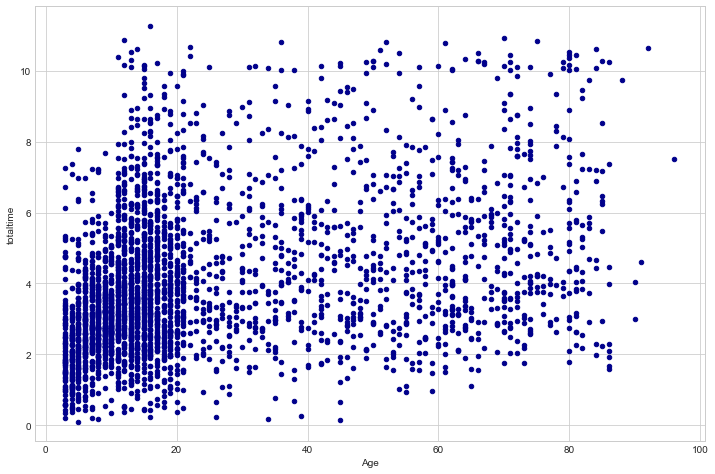

In [33]:
ax1 = sec.plot.scatter(x='Age',   y='totaltime', c='DarkBlue')

In [34]:
VR_ResponseTime.to_csv('C:/Users/tsb7592/Downloads/VR_ResponseTime.csv',index=False)

In [35]:
VR_Response.to_csv('C:/Users/tsb7592/Downloads/VR_Response.csv',index=False)

In [36]:
VR_Score.to_csv('C:/Users/tsb7592/Downloads/VR_Score.csv',index=False)

# Analysis
## Reaction time: 


In [37]:
cp

ItemID,PIN,RegistrationID,VA_RA022,VR_MR001,VR_MR002,VR_MR003,VR_MR004,VR_MR005,VR_MR006,VR_MR007,...,VR_SV003,VR_SV004R1,VR_SV005R1,VR_SV006R1,VR_SV007R1,VR_SV008R1,VR_SV009,VR_SV010,VR_SV011,VR_SV012
0,009,ABCE632D-1895-4DD5-9773-E848E3A1B396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.605265
1,12345678,BE7A8565-9699-42D5-BA5F-86D304B50BA4,NaN,NaN,NaN,NaN,NaN,26.12822,NaN,NaN,...,NaN,NaN,NaN,13.73057,NaN,NaN,NaN,NaN,NaN,NaN
2,5NA6010,8EE1F715-6AE0-43EC-B053-1EAB3BF9E1D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.20981,NaN
3,AL Train,E0DA4239-102F-4B79-9775-86DE3C1BD6BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ATLCERT11,1E28145A-D99E-4FBF-B253-D21EB86445EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.90024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,msl50001,E51171E2-F00C-4B48-885B-5A08C6E5190C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3496,msl50005,E2E3E3EE-D085-4513-85C5-8EFE10EA9AEE,NaN,NaN,41.97112,NaN,NaN,30.48706,NaN,NaN,...,NaN,NaN,NaN,NaN,30.39164,NaN,NaN,NaN,NaN,NaN
3497,sna40104,B22BD1C5-C330-44FA-96F7-41CF7425970D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.997987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,wPX22103,AC5AC37B-4AB4-433A-BAB7-073B36DAD54F,NaN,NaN,NaN,NaN,36.76374,NaN,NaN,NaN,...,NaN,17.12378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df[(df.ItemID =='VR_MR001')&(df.Key=='Score')]

,PIN,RegistrationID,DeviceID,ResponseID,ItemID,AssessmentName,InstrumentTitle,TestName,InstrumentID,Key,Value
1206,MAP05002,5929017C-A220-4B12-A907-647395711681,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,D6C49BE3-3529-49E8-8257-095E43D453F2,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,7CD6BEEA-9E2C-45BE-B6F7-411AA8B7E67D,Score,0
3048,MAP07002,644BFAAB-B3FF-4A35-85BC-435C4CDE1054,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,5FF48EE1-7C63-4AB6-A048-DD8ACC2B6AF2,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,077D677B-18E8-4D2C-B829-C8E40A8E7529,Score,1
3708,MAP10003,6ADC475C-C7EC-46ED-AFE7-BABF6504A012,49CF3CA6-E25F-4420-8E33-7099FFA052DE,60267025-D5CF-430F-92D9-3D4F8225B17A,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,4DEF9140-DFDA-4516-8343-B6F550ED78EC,Score,1
11388,MAP09007,32322C7A-60C1-4FFE-8ACC-F9697CC14168,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,9C1AA9DB-154E-460F-9D10-A0D1F9C7A6F0,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,CB0E4C2A-2C82-46FB-AFFD-573CC3F578E8,Score,1
12036,MAP60005,11BF8541-F067-46C5-B5FF-BCBFEF8547E0,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,A98F9C03-7BBC-4E21-9A23-77E3FE18D057,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,2E866E8A-FC75-4CF7-A655-F8A976FC616A,Score,1
...,...,...,...,...,...,...,...,...,...,...,...
1176395,MSL50104,BCCF4DF9-2DF6-4E0E-9374-F4311FC32792,5CECD629-9F82-40E5-A7C0-05014145BC4C,D12DEA7F-5AC6-4FE4-833B-0A7F0E290159,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,D94A2EDB-8AA4-44B1-B387-86259DE794BF,Score,1
1176809,MSL30111,42632900-8F79-4A00-A935-866947372ADC,D45FD9DA-79BB-4156-997E-AC8843E40A0A,2FB7D87D-2A45-40C7-9200-360C9303BDAC,VR_MR001,Assessment 2,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,731D0986-172B-4D91-BAD6-5D453C92AA01,Score,1
1177361,MSL30112,705F9A99-6111-4F06-8FE5-C1A7C20D76CB,5CECD629-9F82-40E5-A7C0-05014145BC4C,F65B3187-ABD2-4D70-8715-FAAF5715B8E0,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,5BB9AB05-9E50-465F-8224-69B948609839,Score,1
1177937,MSL40115,9A385C36-B7F3-4C6F-A50D-2800C8D4B771,211B4401-4726-4384-8553-EB5BEFB47294,4CF28D58-B61B-4132-BDD6-697012451BA4,VR_MR001,Assessment 1,NIH Toolbox Visual Reasoning Test Norming Vers...,VR_norm,FD78A203-F7A0-4795-BAAC-7EFA564E8BC9,Score,1


In [39]:
VR_Score.describe()

ItemID,Age,VA_RA022,VR_MR001,VR_MR002,VR_MR003,VR_MR004,VR_MR005,VR_MR006,VR_MR007,VR_MR008,...,VR_SV003,VR_SV004R1,VR_SV005R1,VR_SV006R1,VR_SV007R1,VR_SV008R1,VR_SV009,VR_SV010,VR_SV011,VR_SV012
count,3162.000000,128.000000,581.000000,410.000000,358.000000,409.000000,424.000000,394.000000,389.000000,375.000000,...,373.000000,589.000000,407.000000,437.000000,376.000000,385.000000,404.000000,398.000000,388.000000,389.000000
mean,25.553763,0.226562,0.524957,0.390244,0.357542,0.266504,0.389151,0.451777,0.344473,0.088000,...,0.453083,0.679117,0.594595,0.441648,0.380319,0.093506,0.373762,0.402010,0.365979,0.634961
std,22.354449,0.420252,0.499807,0.488401,0.479947,0.442672,0.488134,0.498302,0.475808,0.283673,...,0.498463,0.467213,0.491575,0.497152,0.486112,0.291520,0.484402,0.490921,0.482326,0.482061
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
##For each item, how long did it take people on average to complete the item? 
count =VR_ResponseTime.describe().round(2).iloc[0]
meantime =VR_ResponseTime.describe().round(2).iloc[1]

In [41]:
rv = pd.concat([count,meantime], axis=1)
rv =rv.iloc[1:]

In [42]:
rv.columns =['N', 'MeanTime_Overall']

In [43]:
rv =rv.reset_index()

In [44]:
timecol = VR_ResponseTime.columns[3:].to_list()

In [45]:
timecol

['VA_RA022',
 'VR_MR001',
 'VR_MR002',
 'VR_MR003',
 'VR_MR004',
 'VR_MR005',
 'VR_MR006',
 'VR_MR007',
 'VR_MR008',
 'VR_MR009R1',
 'VR_MR010',
 'VR_MR011R1',
 'VR_MR012',
 'VR_MR013R1',
 'VR_MR014R1',
 'VR_MR015R1',
 'VR_MR016',
 'VR_MR017',
 'VR_MR018',
 'VR_MR019R1',
 'VR_MR020',
 'VR_MR021',
 'VR_MR022',
 'VR_MR023',
 'VR_MR024',
 'VR_MR025R1',
 'VR_MR026R1',
 'VR_MR027R1',
 'VR_MR028',
 'VR_MR029',
 'VR_MR030R1',
 'VR_MR031R1',
 'VR_MR032',
 'VR_MR033R1',
 'VR_MR034R1',
 'VR_MR035',
 'VR_MR036',
 'VR_MR037',
 'VR_MR038',
 'VR_MR039R1',
 'VR_PC001R1',
 'VR_PC002',
 'VR_PC004R1',
 'VR_PC005R1',
 'VR_PC006R1',
 'VR_PC007',
 'VR_PC008',
 'VR_PC009',
 'VR_PC011',
 'VR_PC012R1',
 'VR_PC013',
 'VR_PC014R1',
 'VR_PC015',
 'VR_PC016',
 'VR_PC017',
 'VR_PC018R1',
 'VR_PC019R1',
 'VR_PC020',
 'VR_PC021R1',
 'VR_PC022R1',
 'VR_PC023',
 'VR_PC024',
 'VR_PC025',
 'VR_PC026',
 'VR_PC027',
 'VR_RA001',
 'VR_RA002R1',
 'VR_RA004',
 'VR_RA011R1',
 'VR_RA013',
 'VR_RA014R1',
 'VR_RA015R1',
 'VR_RA0

In [46]:
adc ={}
for col in timecol:
    adc[col]=round(VR_ResponseTime[VR_ResponseTime[col].notnull()]['Age'].mean(),2)

In [47]:
meanage = pd.DataFrame.from_dict(adc,orient='index')

In [48]:
meanage=meanage.reset_index()
meanage.columns=['ItemID','mean_age']

In [49]:
meanage

,ItemID,mean_age
0,VA_RA022,3.52
1,VR_MR001,24.82
2,VR_MR002,32.84
3,VR_MR003,30.00
4,VR_MR004,32.21
...,...,...
189,VR_SV008R1,33.39
190,VR_SV009,32.80
191,VR_SV010,32.66
192,VR_SV011,30.05


In [50]:
data=pd.merge(meanage, rv, on="ItemID")

In [51]:
data.head()

,ItemID,mean_age,N,MeanTime_Overall
0,VA_RA022,3.52,128.0,7.05
1,VR_MR001,24.82,581.0,11.39
2,VR_MR002,32.84,410.0,18.37
3,VR_MR003,30.00,358.0,19.06
4,VR_MR004,32.21,409.0,17.57


In [52]:
VR_Score.describe().round(2)

ItemID,Age,VA_RA022,VR_MR001,VR_MR002,VR_MR003,VR_MR004,VR_MR005,VR_MR006,VR_MR007,VR_MR008,...,VR_SV003,VR_SV004R1,VR_SV005R1,VR_SV006R1,VR_SV007R1,VR_SV008R1,VR_SV009,VR_SV010,VR_SV011,VR_SV012
count,3162.00,128.00,581.00,410.00,358.00,409.00,424.00,394.00,389.00,375.00,...,373.00,589.00,407.00,437.00,376.00,385.00,404.00,398.00,388.00,389.00
mean,25.55,0.23,0.52,0.39,0.36,0.27,0.39,0.45,0.34,0.09,...,0.45,0.68,0.59,0.44,0.38,0.09,0.37,0.40,0.37,0.63
std,22.35,0.42,0.50,0.49,0.48,0.44,0.49,0.50,0.48,0.28,...,0.50,0.47,0.49,0.50,0.49,0.29,0.48,0.49,0.48,0.48
min,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,16.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,37.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,...,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00
max,96.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [53]:
##proportion of people who got it right (sum of those values == 1 divided by N)
proportionRight =VR_Score.describe().round(2).iloc[1]

In [54]:
proportionRight =proportionRight.iloc[1:]

In [55]:
#within those people who got it right, what was their mean 
meantime_c = cp.describe().round(2).iloc[1]
#within those people who got it right, what was their SD
sdtime_c = cp.describe().round(2).iloc[2]

In [56]:
correctcol = pd.concat([proportionRight,meantime_c, sdtime_c], axis=1)

In [57]:
correctcol.columns = ['ProportionCorrect', 'MeanTime_Correct', 'SDTime_Correct']

In [58]:
datacorrect =pd.merge(data,correctcol, how='left',on="ItemID")

In [59]:
#within those people who got it wrong, what was their mean 
meantime_w = wp.describe().round(2).iloc[1]
#within those people who got it wrong, what was their SD
sdtime_w = wp.describe().round(2).iloc[2]

In [60]:
wcol = pd.concat([meantime_w, sdtime_w], axis=1)

In [61]:
wcol.columns = [ 'MeanTime_Incorrect', 'SDTime_Incorrect']

In [62]:
final =pd.merge(datacorrect, wcol, how='left',on="ItemID")

In [63]:
final.shape

(194, 9)

In [64]:
common = final.merge(vr1['ItemID'],on=['ItemID'], how="right")

In [65]:
common.drop_duplicates()

,ItemID,mean_age,N,MeanTime_Overall,ProportionCorrect,MeanTime_Correct,SDTime_Correct,MeanTime_Incorrect,SDTime_Incorrect
0,VR_RA058R1,25.40,598.0,8.92,0.58,8.94,4.28,8.69,6.25
1,VR_SS3004R1,7.68,188.0,5.98,0.18,6.14,3.40,6.29,3.97
2,VR_PC002,7.71,192.0,5.11,0.77,5.46,2.52,3.82,2.73
3,VR_SS3005R1,24.48,614.0,8.36,0.77,8.34,4.90,8.40,6.72
4,VR_RA062R1,24.07,608.0,10.93,0.50,11.59,6.97,10.14,7.01
...,...,...,...,...,...,...,...,...,...
684,VR_RA001,3.52,112.0,3.88,0.46,4.54,3.82,2.97,4.55
688,VR_RA044R1,3.50,111.0,4.02,0.50,4.34,3.96,3.82,4.55
710,VR_RA011R1,3.56,113.0,4.84,0.25,3.83,1.77,5.10,10.21
805,VR_MR025R1,32.80,387.0,16.60,0.50,18.16,10.94,15.11,11.64


In [66]:
final.to_csv('C:/Users/tsb7592/Downloads/Reaction_time.csv', index=False)

In [67]:
final.shape

(194, 9)

# Distractor analysis

In [68]:
VR_Response.columns[3:].value_counts()

VR_SR010       1
VR_SS001R1     1
VR_SS3014      1
VR_SS2107R1    1
VR_SG004       1
              ..
VR_RA059       1
VR_RA045       1
VR_SR017       1
VR_PC004R1     1
VR_MR003       1
Name: ItemID, Length: 194, dtype: int64

In [69]:
answer_count = []
for col in VR_Response.columns[3:]:
    a =VR_Response[col].value_counts().rename_axis('Answers').reset_index(name='counts')
    a['ItemID'] = col
    a= a.pivot(index='ItemID', columns='Answers', values='counts')
    answer_count.append(a)
    
adf = pd.concat(answer_count)

In [70]:
answersheet= pd.read_csv('C:/Users/tsb7592/Downloads/vr_correct_responses.csv',index_col=0)

In [71]:
adf =pd.merge(adf, answersheet[['ItemID', 'RightResponse']], on='ItemID', how='left')

In [72]:
adf

,ItemID,1.0,2.0,3.0,4.0,RightResponse
0,VA_RA022,21,29,51,27,2
1,VR_MR001,305,128,105,43,1
2,VR_MR002,46,109,160,95,3
3,VR_MR003,128,78,73,79,1
4,VR_MR004,128,100,72,109,4
...,...,...,...,...,...,...
189,VR_SV008R1,50,215,84,36,4
190,VR_SV009,56,151,95,102,2
191,VR_SV010,53,160,134,51,2
192,VR_SV011,64,112,142,70,3


In [73]:
adf['N']= adf.iloc[:,1:5].sum(axis=1)

In [74]:
dc = {}
for j in range(1,5):
    for i , row in adf[adf['RightResponse'] ==j].iterrows():
        key = row['ItemID'] 
        dc[key] = row[j]

In [75]:
dc =pd.DataFrame.from_dict(dc ,orient='index')

In [76]:
dc=dc.reset_index()

In [77]:
dc.columns=['ItemID','ProportionCorrect']

In [78]:
dc

,ItemID,ProportionCorrect
0,VR_MR001,305
1,VR_MR003,128
2,VR_MR007,134
3,VR_MR011R1,109
4,VR_MR014R1,92
...,...,...
189,VR_SS3004R1,34
190,VR_SS3012,196
191,VR_SV001,197
192,VR_SV004R1,400


In [79]:
adf =pd.merge(adf, dc, on='ItemID',how='left')

In [80]:
adf['ProportionCorrect'] = adf['ProportionCorrect']/adf['N']

In [81]:
adf.head()

,ItemID,1.0,2.0,3.0,4.0,RightResponse,N,ProportionCorrect
0,VA_RA022,21,29,51,27,2,128,0.226562
1,VR_MR001,305,128,105,43,1,581,0.524957
2,VR_MR002,46,109,160,95,3,410,0.390244
3,VR_MR003,128,78,73,79,1,358,0.357542
4,VR_MR004,128,100,72,109,4,409,0.266504


#point biserial correlation. 
#This is the computation with most steps. It requires getting the sum score of each individual who took this item (need the Response.csv), dividing this sum score by some number depending on their age like we did earlier, and then producing the correlation of ItemID. The data you are going to correlate, for each ItemID, may look something like this:

In [105]:
VR_Score['Avg_Score_for_Test'] = VR_Score.iloc[:,4:].mean(axis=1)

In [111]:
VR_Score.shape

(3162, 199)

In [115]:
pbdata  = pd.melt(VR_Score, id_vars =['PIN'], value_vars =VR_Score.columns[4:198])

In [117]:
pdc = pd.merge(pbdata, VR_Score[['PIN','Avg_Score_for_Test']], on='PIN')

In [120]:
pdc =pdc[pdc['value'].notna()]

In [123]:
pdc.columns=['PIN', 'ItemID', 'Score', 'Avg_Score_for_Test']

In [126]:
pdc.sort_values('ItemID')

,PIN,ItemID,Score,Avg_Score_for_Test
148410,MCH03010,VA_RA022,0.0,0.400000
148216,MCH03008,VA_RA022,0.0,0.333333
148022,MCH03007,VA_RA022,1.0,0.500000
147828,MCH03001,VA_RA022,1.0,0.200000
395372,SAT04019,VA_RA022,0.0,0.366667
...,...,...,...,...
695877,WLA70115,VR_SV012,1.0,0.550000
669881,WLA20003,VR_SV012,1.0,0.550000
548243,SDA30014,VR_SV012,0.0,0.500000
291775,NBS11015,VR_SV012,1.0,0.300000


In [132]:
np.array(pdc[pdc.ItemID =='VA_RA022'].Score)

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [128]:
pdc.ItemID.nunique()

194

In [133]:
from scipy import stats
import numpy as np

dc = {}
for Item in pdc.ItemID.unique():
    a =np.array(pdc[pdc.ItemID ==Item].Score)
    b =np.array(pdc[pdc.ItemID ==Item].Avg_Score_for_Test)
    #b = np.arange(len(a))
    tstat, p = stats.pointbiserialr(a,b)
    print(round(tstat,2))
    dc[Item] = round(tstat,2)

0.3
0.24
0.39
0.39
0.32
0.15
0.12
0.44
0.37
0.3
0.32
0.3
0.34
0.36
0.37
0.28
0.21
0.26
0.3
0.26
0.22
0.34
0.38
0.37
0.33
0.4
0.18
0.28
0.34
0.46
0.14
0.39
-0.09
0.41
0.26
0.29
0.29
0.55
0.21
0.32
0.37
0.18
0.35
0.29
0.36
0.37
0.57
0.34
0.17
0.38
0.42
0.01
0.29
-0.09
0.37
0.34
0.4
0.38
0.38
0.39
0.45
0.22
0.27
0.16
0.22
0.44
0.24
0.22
0.29
0.3
0.16
0.41
0.25
0.22
0.29
0.31
0.54
0.47
0.28
0.34
0.26
0.1
0.24
0.26
0.04
0.24
0.36
0.45
0.31
0.31
0.57
0.57
0.34
0.53
0.42
0.43
0.6
0.43
0.39
0.54
0.33
0.35
0.62
0.43
0.5
0.7
0.57
0.46
0.58
0.62
0.43
0.42
0.38
0.62
0.58
0.37
0.32
0.47
0.48
-0.15
0.56
0.4
0.23
0.53
0.46
0.27
0.59
0.18
0.46
0.48
0.39
0.45
0.45
0.35
0.52
0.37
0.36
0.5
0.32
0.4
0.41
0.22
0.51
0.58
0.6
0.41
0.58
0.6
0.17
0.62
0.52
0.4
0.46
0.42
0.42
0.38
0.42
0.39
0.27
0.56
0.7
0.55
0.46
0.48
0.44
0.46
0.63
0.35
0.52
0.36
0.5
0.48
0.55
0.42
0.34
0.34
0.43
0.43
0.39
0.51
0.3
0.31
0.42
-0.04
0.47
0.37
0.28
0.47
0.43
0.45
0.51
0.4
0.52
0.34


In [134]:
dc

{'VR_MR004': 0.3,
 'VR_MR007': 0.24,
 'VR_MR019R1': 0.39,
 'VR_MR020': 0.39,
 'VR_MR027R1': 0.32,
 'VR_MR031R1': 0.15,
 'VR_MR033R1': 0.12,
 'VR_PC005R1': 0.44,
 'VR_PC020': 0.37,
 'VR_PC022R1': 0.3,
 'VR_RA056R1': 0.32,
 'VR_RA061': 0.3,
 'VR_SR005': 0.34,
 'VR_SR008': 0.36,
 'VR_SR012R1': 0.37,
 'VR_SR016R1': 0.28,
 'VR_SR017': 0.21,
 'VR_SS003': 0.26,
 'VR_SV004R1': 0.3,
 'VR_SV012': 0.26,
 'VR_MR003': 0.22,
 'VR_MR005': 0.34,
 'VR_MR015R1': 0.38,
 'VR_MR017': 0.37,
 'VR_MR026R1': 0.33,
 'VR_PC024': 0.4,
 'VR_PC027': 0.18,
 'VR_RA038': 0.28,
 'VR_RA047': 0.34,
 'VR_RA066': 0.46,
 'VR_RA070': 0.14,
 'VR_SR013R1': 0.39,
 'VR_SS004': -0.09,
 'VR_SS2111R1': 0.41,
 'VR_SV002': 0.26,
 'VR_SV006R1': 0.29,
 'VR_MR014R1': 0.29,
 'VR_MR025R1': 0.55,
 'VR_MR032': 0.21,
 'VR_MR039R1': 0.32,
 'VR_RA023R1': 0.37,
 'VR_RA064R1': 0.18,
 'VR_RA065': 0.35,
 'VR_SR015R1': 0.29,
 'VR_SR018R1': 0.36,
 'VR_SR019R1': 0.37,
 'VR_SS001R1': 0.57,
 'VR_SS2108R1': 0.34,
 'VR_SS2115R1': 0.17,
 'VR_SS3005R1': 0.

In [135]:
num = pd.DataFrame.from_dict(dc,orient='index')

In [137]:
num = num.reset_index()
num.columns=['ItemID','point_biserial']

In [138]:
num

,ItemID,point_biserial
0,VR_MR004,0.30
1,VR_MR007,0.24
2,VR_MR019R1,0.39
3,VR_MR020,0.39
4,VR_MR027R1,0.32
...,...,...
189,VR_SS2112,0.45
190,VR_RA011R1,0.51
191,VR_SS2010R1,0.40
192,VR_PC013,0.52


In [140]:
rv = pd.merge(adf, num, on='ItemID',how='left')
rv

,ItemID,1.0,2.0,3.0,4.0,RightResponse,N,ProportionCorrect,point_biserial
0,VA_RA022,21,29,51,27,2,128,0.226562,-0.04
1,VR_MR001,305,128,105,43,1,581,0.524957,0.43
2,VR_MR002,46,109,160,95,3,410,0.390244,0.22
3,VR_MR003,128,78,73,79,1,358,0.357542,0.22
4,VR_MR004,128,100,72,109,4,409,0.266504,0.30
...,...,...,...,...,...,...,...,...,...
189,VR_SV008R1,50,215,84,36,4,385,0.093506,0.27
190,VR_SV009,56,151,95,102,2,404,0.373762,0.34
191,VR_SV010,53,160,134,51,2,398,0.402010,0.22
192,VR_SV011,64,112,142,70,3,388,0.365979,0.01
